In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
!gdown "C:\Users\Мвидео\Desktop\adult income1.csv"

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=C:\Users\Мвидео\Desktop\adult income1.csv

but Gdown can't. Please check connections and permissions.


In [4]:
df=pd.read_csv('adult income1.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


Сколько мужчин и женщин представлено в наборе? 

In [20]:
df['sex'].value_counts()

sex
Male      21349
Female    10598
Name: count, dtype: int64

In [22]:
df['sex'].value_counts(normalize=True)

sex
Male      0.668263
Female    0.331737
Name: proportion, dtype: float64

Хочу узнать какой средний возраст мужчин и женщин

In [30]:
df.groupby(['sex'])['age'].mean()

sex
Female    36.854878
Male      39.422455
Name: age, dtype: float64

Теперь хочу узнать процет жителей из Германии

In [53]:
float(((df['native.country']=='Germany')).sum()) / df.shape[0]

1.0

Дальше найдены среднее значение и стандартное отклонение возрасте тех, кто зарабатывает больше 50 и тех, кто зарабатывает меньше 50

In [113]:
dic={'<=50K':False, '>50K': True}
df=df.replace({'income': dic})
df.head() 
# для начала я взяла и переименовала в столбце "income" значения на True и False

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income,High_income,categori_marital
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,Germany,False,False,Холостяк
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,Germany,False,False,Холостяк
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,Germany,False,False,Холостяк
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,Germany,False,False,Холостяк
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,Germany,False,False,Холостяк


In [67]:
df.groupby(['income'])['age'].agg([np.mean, np.std])

C:\Users\Мвидео\AppData\Local\Temp\ipykernel_15392\1930583034.py:1: FutureWarning: The provided callable <function mean at 0x00000269A394D080> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['income'])['age'].agg([np.mean, np.std])
C:\Users\Мвидео\AppData\Local\Temp\ipykernel_15392\1930583034.py:1: FutureWarning: The provided callable <function std at 0x00000269A394D1C0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(['income'])['age'].agg([np.mean, np.std])


,mean,std
income,,
False,36.778767,14.030784
True,44.229858,10.510047


Посмотрим на семейный статус тех мужчин , что зарабатывет больше 50

In [ ]:
# не женатыми  будет считать только тех, кто имееет статус Never-married, Separated и Widowed

df['marital.status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [110]:
df.loc[(df['sex'] == 'Male') &
     (df['marital.status'].isin(['Never-married', 
                                   'Separated', 
                                   'Divorced',
                                   'Widowed'])), 'income'].value_counts()

income
False    7405
True      681
Name: count, dtype: int64

Визуализация данных

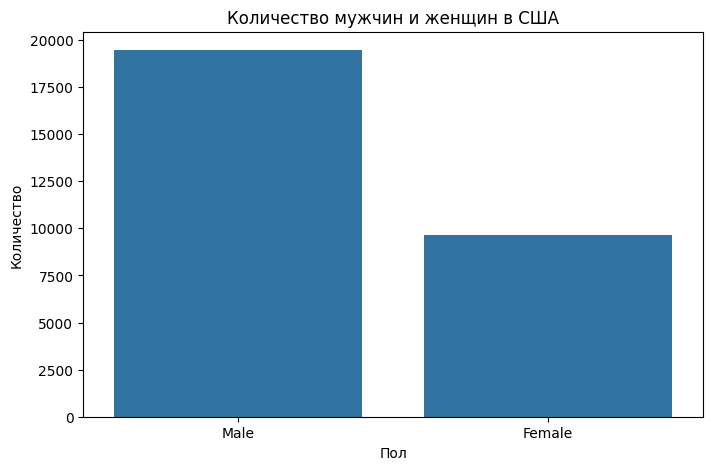

In [31]:
#график, визуализирующий количество мужчин и женщин в Соединенных штатах

country = df[df['native.country'] == 'United-States']

# Считаем количество мужчин и женщин
counts_gender = country['sex'].value_counts().reset_index()
counts_gender.columns = ['sex', 'count']  

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(data=counts_gender,
             x='sex',
             y='count'
            )
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.title('Количество мужчин и женщин в США')  
plt.show()




График, показывающий  кол-во неженатых мужчин в таких странах, как США, Япония и Китай

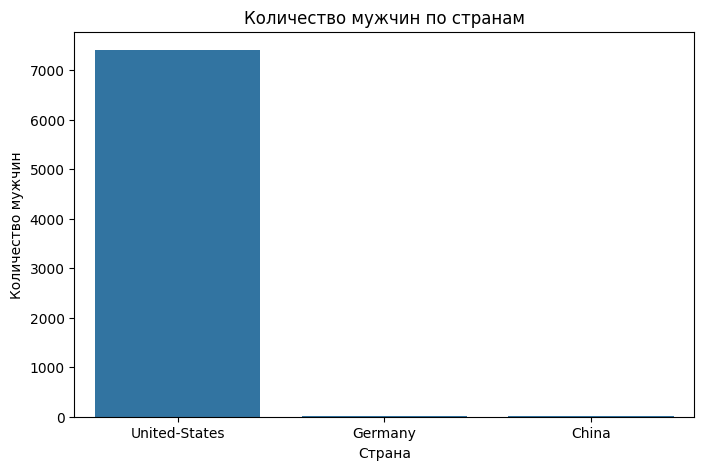

In [ ]:
a = ['United-States', 'Germany', 'China']
filtered_country = df[df['native.country'].isin(a)]

male = filtered_country.loc[
    (filtered_country['sex'] == 'Male') &
    (filtered_country['marital.status'].isin(['Never-married', 'Separated', 'Divorced', 'Widowed']))
]


counts_male = male['native.country'].value_counts().reset_index()
counts_male.columns = ['native.country', 'count'] 

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(data=counts_male,
             x='native.country',
             y='count'
            )
plt.xlabel('Страна')
plt.ylabel('Количество мужчин')
plt.title('Количество мужчин по странам')
plt.show()